### importation de libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

import os
import seaborn as sns
import cv2

#from keras.utils.np_utils import to_categorical

print(tf.__version__)

2.13.0


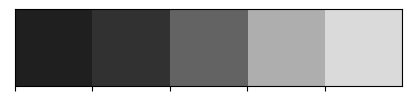

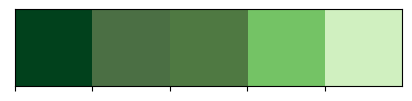

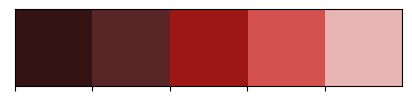

In [3]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

### Importation des données
recupération de chemin de données d'entrainement et de test

In [4]:
TRAIN_DIR = r'dataset\train'
IMG_SIZE = 150

Créattion de fonction

In [5]:
#
def get_data(class_name, dir):
    dataSet = []
    
    for name in class_name:
        path = os.path.join(dir, name)
        
        path_img = os.listdir(path)
        label = class_name.index(name)
        
        for img in path_img:
            
            img_array = cv2.imread(os.path.join(path, img))
            new_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            
            dataSet.append([new_img_array, label])
            
    return dataSet

In [6]:
class_name = ['adenocarcinoma', 'large.cell.carcinoma', 'squamous.cell.carcinoma', 'normal']

In [7]:
def get_X_y(data):
    X, y = [],[]
    
    for variable, label in data :
        X.append(variable)
        y.append(label)
        
    return X, y

In [8]:
data = get_data(class_name, TRAIN_DIR)

X, y = get_X_y(data)

### Analyse exploratoire de données

In [9]:
np.array(X).shape

(613, 150, 150, 3)

La matrice X est un tableau qui contient 613 images, dont chaque image à une taille de 150x150 tridimensionnelle(l'image est colorée)

* Affichage aléatoire de quelque images

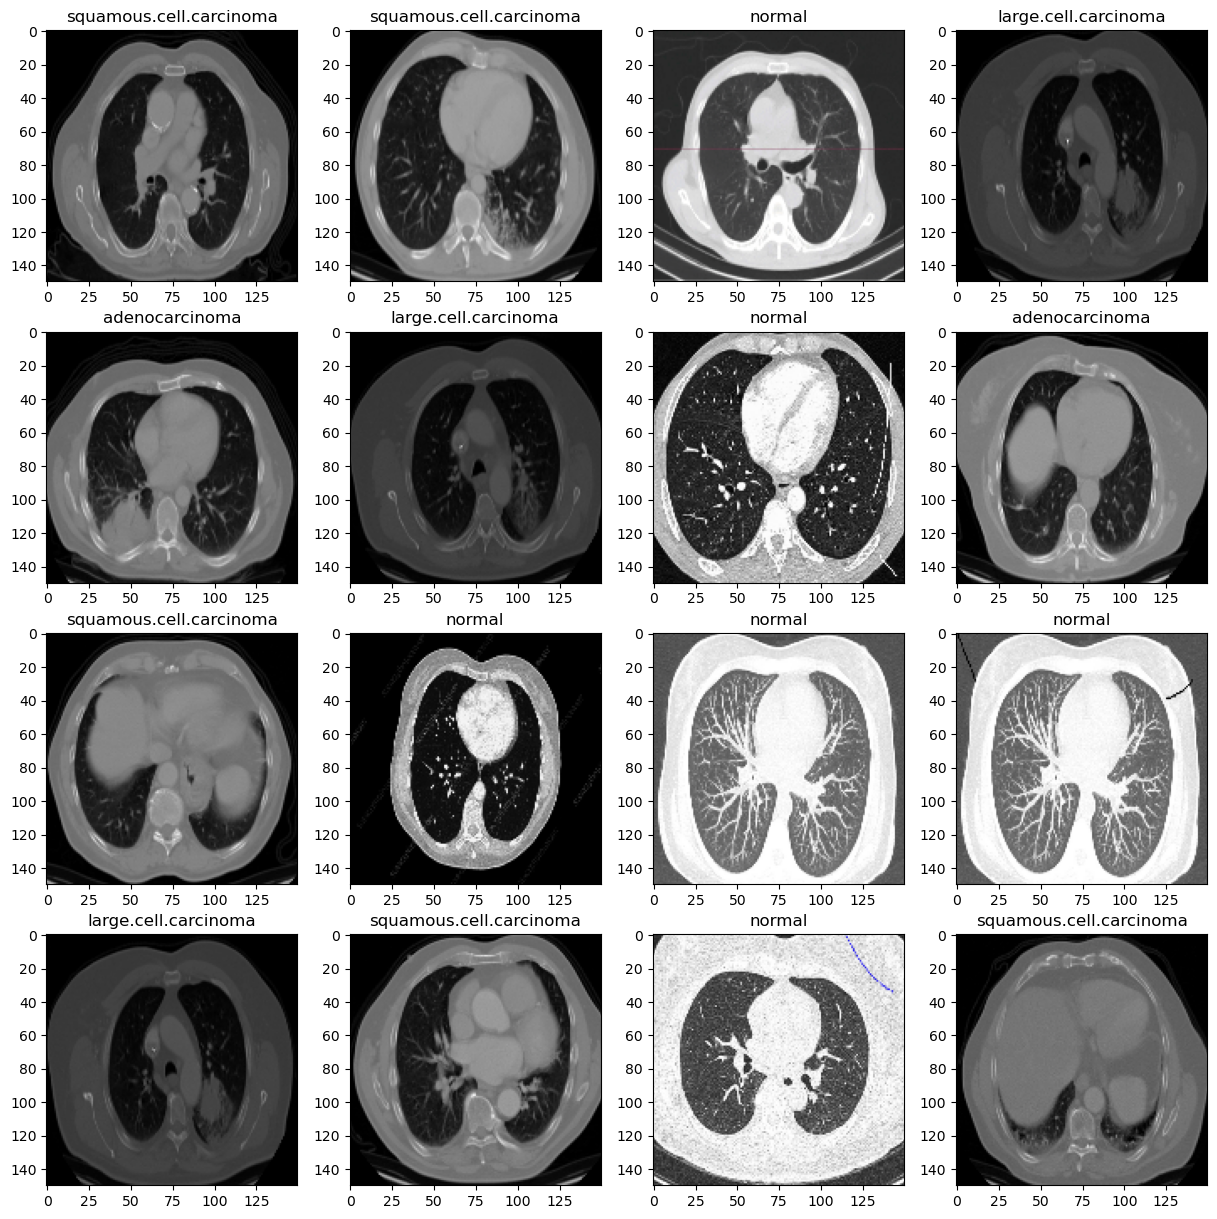

In [10]:
fig = plt.figure(figsize=(15, 15))

columns = 4
rows = 4

X_ = np.array(X)

for i in range(1, columns * rows + 1):
    index = np.random.randint(len(X))
    img = X[index]
    fig.add_subplot(rows, columns, i)
    plt.title(class_name[y[index]])
    
    plt.imshow(img)
    
plt.show()

In [11]:
#data.describe()

(array([195.,   0.,   0., 115.,   0.,   0., 155.,   0.,   0., 148.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

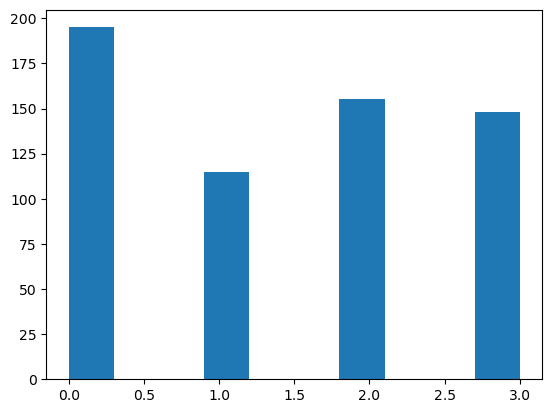

In [12]:
plt.hist(y)

In [13]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


### Segmentation de l'ensemble de données en sous-ensembles d'entraînement (training set) et de test (test set)
Nous optons de faire une segmentation de l'ensemble de données en ensembles d'apprentissage et de test comprenant chacun repectivement <b>80%</b> et <b>20%</b> des données.

In [14]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 0)

VALIDATE_DIR = r'dataset\validation'

In [15]:
X_train = np.array(X, dtype='float')

X_train /= 255.0
y_train = np.array(y)

data_valid = get_data(class_name, VALIDATE_DIR)

X_valid, y_valid = get_X_y(data_valid)

X_valid = np.array(X_valid, dtype='float')

X_valid /= 255.0
y_valid = np.array(y_valid)

In [16]:
X_train.shape

(613, 150, 150, 3)

In [17]:
y_train.shape

(613,)

In [18]:
X_valid.shape

(72, 150, 150, 3)

### Création du modèle

Construction du Reseau de neurone à convolution

In [19]:
model = Sequential()

model.add(Conv2D(16, (3, 3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))
          
model.add(Flatten())
          
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
          
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
          
model.add(Dense(25,activation='sigmoid'))
   

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 32)        1

Entrainement du modele

In [21]:
#sparse_categorical_crossentropy
#categorical_crossentropy
#optimizer ='adam'
model.compile(optimizer=tf.optimizers.SGD(lr=0.001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])    

In [22]:
ITERACTION = 50

history = model.fit(X_train, y_train, epochs = ITERACTION, validation_data = (X_valid, y_valid))

Epoch 1/50
20/20 [==============================] - 23s 813ms/step - loss: 3.8159 - accuracy: 0.0848 - val_loss: 3.0304 - val_accuracy: 0.2083
Epoch 2/50
20/20 [==============================] - 16s 790ms/step - loss: 2.8265 - accuracy: 0.2741 - val_loss: 2.8611 - val_accuracy: 0.2083
Epoch 3/50
20/20 [==============================] - 16s 800ms/step - loss: 2.2955 - accuracy: 0.4078 - val_loss: 3.1296 - val_accuracy: 0.2083
Epoch 4/50
20/20 [==============================] - 25s 1s/step - loss: 1.9771 - accuracy: 0.5139 - val_loss: 2.9719 - val_accuracy: 0.2083
Epoch 5/50
20/20 [==============================] - 18s 885ms/step - loss: 1.9253 - accuracy: 0.5220 - val_loss: 3.5092 - val_accuracy: 0.2083
Epoch 6/50
20/20 [==============================] - 17s 865ms/step - loss: 1.6970 - accuracy: 0.5530 - val_loss: 3.7310 - val_accuracy: 0.2083
Epoch 7/50
20/20 [==============================] - 16s 811ms/step - loss: 1.6279 - accuracy: 0.5775 - val_loss: 4.8104 - val_accuracy: 0.2083
Ep

In [23]:
### Courbe de la fonction d'erreur et de la precision

In [24]:
def plot_learning_curve(history, epoch):
    epoch_range = range(1, epoch + 1)
    
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    
    plt.title('Précision du modèle')
    plt.ylabel('Model')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    
    plt.show()
    
    
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    
    plt.title('Perte de modèle')
    plt.ylabel('Model')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    
    plt.show()

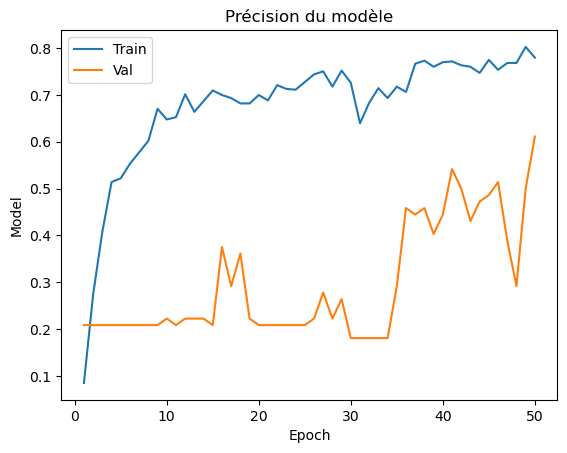

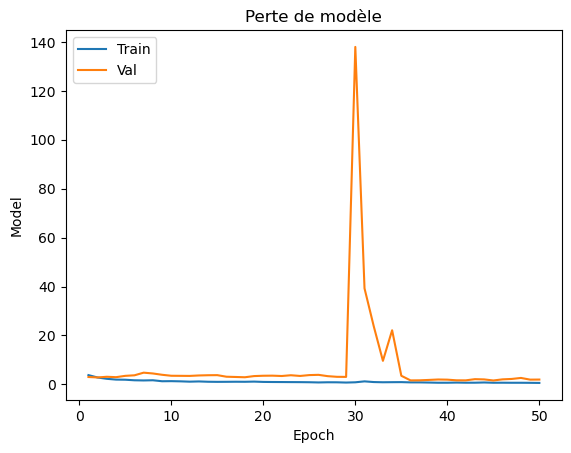

In [25]:
plot_learning_curve(history, ITERACTION)

In [26]:
score = model.evaluate(X_valid, y_valid)

print('\nTest Loss : ', score[0])
print("Accuracy : %.2f%% " % (score[1]*100))
print('Test Precision : ', score[1])

3/3 [==============================] - 1s 100ms/step - loss: 1.9922 - accuracy: 0.6111

Test Loss :  1.9921514987945557
Accuracy : 61.11% 
Test Precision :  0.6111111044883728


In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_valid, np.argmax(model.predict(X_valid), axis=1)))

3/3 [==============================] - 1s 100ms/step
              precision    recall  f1-score   support

           0       0.54      0.65      0.59        23
           1       0.63      0.57      0.60        21
           2       0.50      0.27      0.35        15
           3       1.00      1.00      1.00        13
           4       0.00      0.00      0.00         0

    accuracy                           0.61        72
   macro avg       0.53      0.50      0.51        72
weighted avg       0.64      0.61      0.62        72



C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3/3 [==============================] - 1s 100ms/step


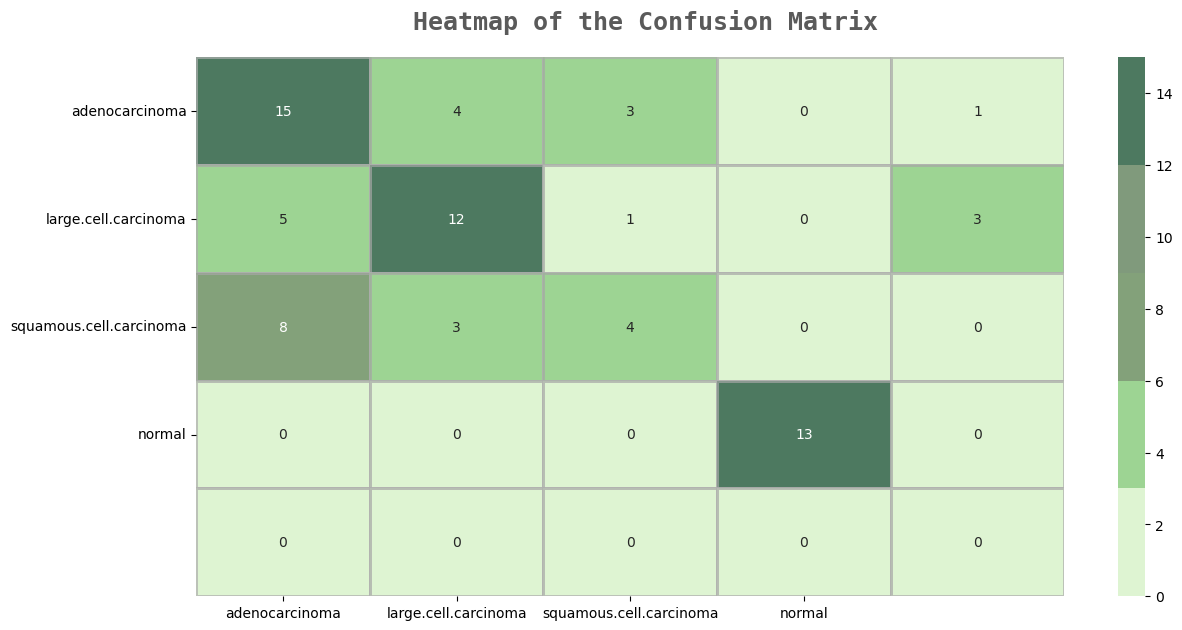

In [28]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_valid, np.argmax(model.predict(X_valid), axis=1)), 
            ax=ax, 
            xticklabels=class_name, 
            yticklabels=class_name,
            annot=True,
           cmap=colors_green[::-1],alpha=0.7,
            linewidths=2,linecolor=colors_dark[3])

fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

### Prédiction de nouvel image

In [29]:
def get_X(dir):
    X = []
    
    path = dir
    path_img = os.listdir(path)
    
    for img in path_img:

        img_array = cv2.imread(os.path.join(path, img))
        new_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

        X.append(new_img_array)
        
    return X

In [30]:
TEST_DIR = r'dataset\test_data'

X_new = get_X(TEST_DIR)

In [31]:
X_new = np.array(X_new, dtype='float')
X_new /= 255.0

In [32]:
X_new.shape

(16, 150, 150, 3)

In [33]:
#y_predict = (model.predict(X_new) > 0.5).astype("int32")

y_predict = np.argmax(model.predict(X_new),axis=1)


1/1 [==============================] - 0s 201ms/step


In [34]:

y_predict.shape

(16,)

In [35]:
y_predict

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3], dtype=int64)

1/1 [==============================] - 0s 238ms/step


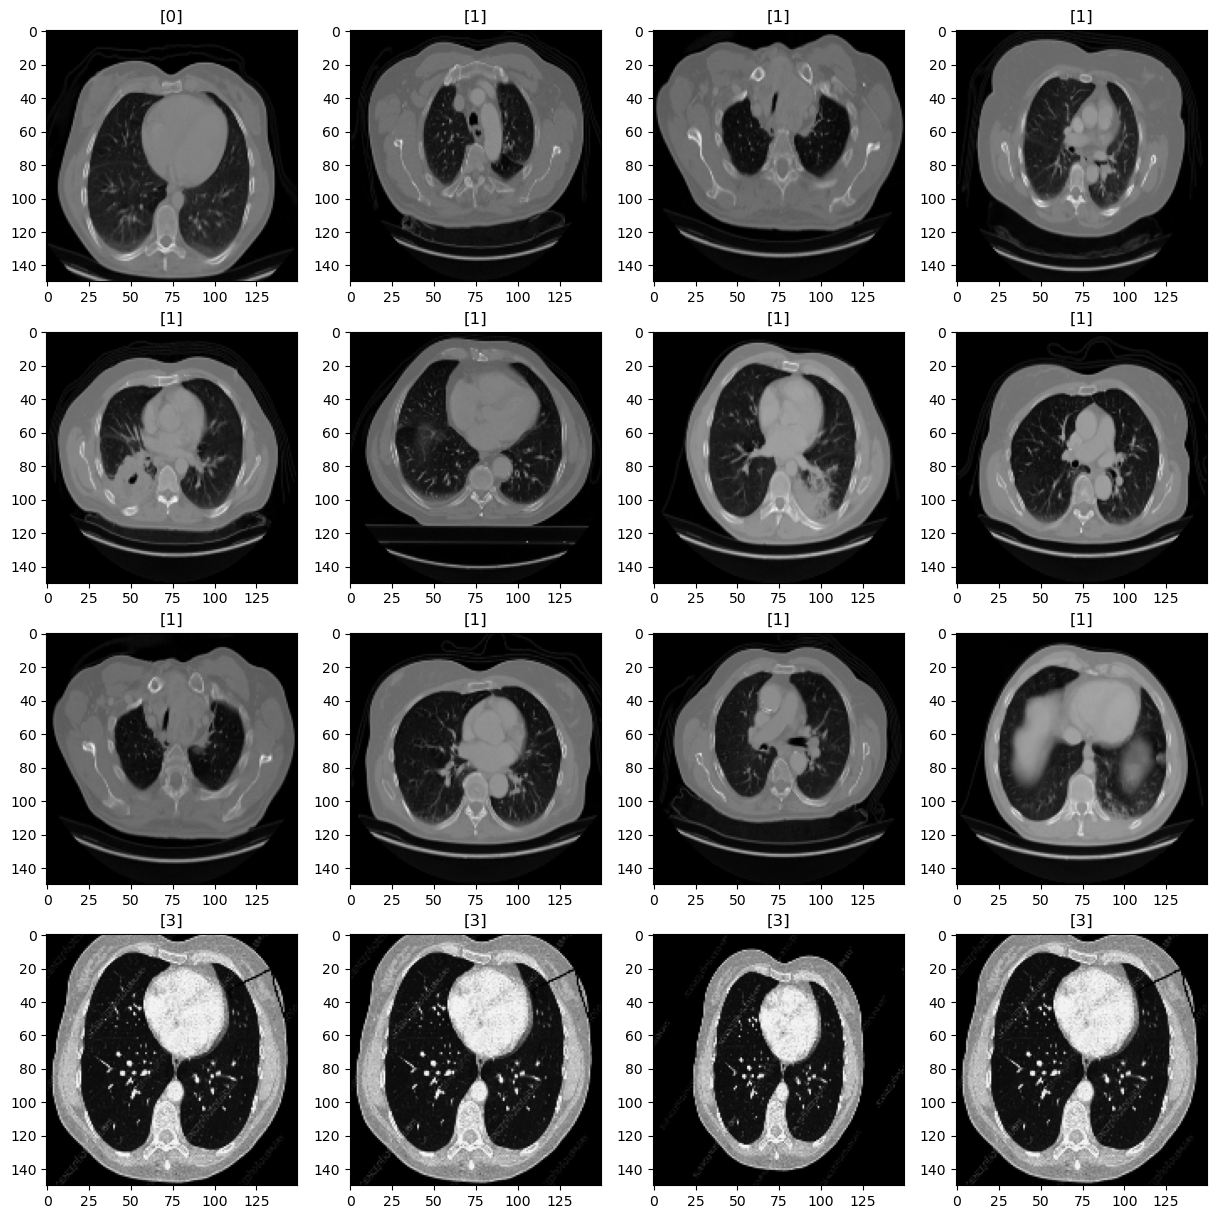

In [36]:
fig = plt.figure(figsize=(15, 15))

columns = 4
rows = 4

for i in range(1, len(model.predict(X_new)) + 1):
    img = X_new[i-1]
    fig.add_subplot(rows, columns, i)
    plt.title([y_predict[i-1]])
    
    plt.imshow(img)
    
plt.show()

In [37]:
import ipywidgets as widgets
from PIL import Image
from IPython.display import display,clear_output
import io

In [38]:
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
        
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(IMG_SIZE,IMG_SIZE))
    img = img.reshape(1,IMG_SIZE,IMG_SIZE,3)
    X_new = img
        
    img = np.array(img, dtype='float')
    img /= 255.0
    
   
    predict = np.argmax(model.predict(img), axis=1)[0]

    if predict == 0:
        y_predict = class_name[0]
    elif predict == 1:
        y_predict = class_name[1]
    elif predict == 2:
        y_predict = class_name[2]
    elif predict == 3:
        y_predict = class_name[3]

    print(f'La prediction :\n**************************************')
    
    if predict >= 0:
        fig = plt.figure(figsize=(5, 5))
        #fig.add_subplot(1, 1, 1)
        plt.title(y_predict)

        plt.imshow(opencvImage)
    
        plt.show()

In [39]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [40]:
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)
            
        except:
            print('No Image Uploaded/Invalid Image File')
            
button.on_click(on_button_clicked)
widgets.VBox([button,out])